# Exercício 6 de Análise de Componentes Independentes
Pedro Bandeira de Mello Martins

CPE 782 - Análise de Componentes Independentes



Análise feita para 1000 amostras

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from scipy.cluster.vq import whiten
import pandas as pd
from pandas.plotting import scatter_matrix
from scipy.stats import entropy, chi2_contingency, shapiro

%matplotlib inline
from evaluation import calculateNegentropy, kde_entropy, KLdivergence, resultsTable, plot_MutualInformation, graph_fittedData
from ICAfunctions import cichocki_Feedback, cichocki_Feedforward, NPCA_RLS

#Notes:
#SHAPIRO: The algorithm used is described in [R634] but censoring parameters as 
#        described are not implemented. For N > 5000 the W test statistic is 
#        accurate but the p-value may not be.

In [2]:
learning_rate = 1e-6
gaussian_distribution = np.random.normal(0,1,1000)
shapiro(np.random.uniform(-1,1,1000))

(0.9506409168243408, 8.374785148709453e-18)

In [3]:
filePath = 'https://raw.githubusercontent.com/micaelverissimo/ICA/master/SixthMixture1000Stats.txt'
distDataFrame = pd.read_table(filePath, delimiter = '\s+', header = None)
mixtures = distDataFrame.values
print(distDataFrame.T.head())

          0         1         2         3
0  0.126821  0.632137  0.417176 -0.404622
1 -0.957063  0.999996  0.984580  0.860499
2  0.768318  0.999999 -0.694455  0.557814
3 -0.945421  0.997646 -0.406144  0.523482
4 -0.312215  0.998544  0.918215 -0.754007


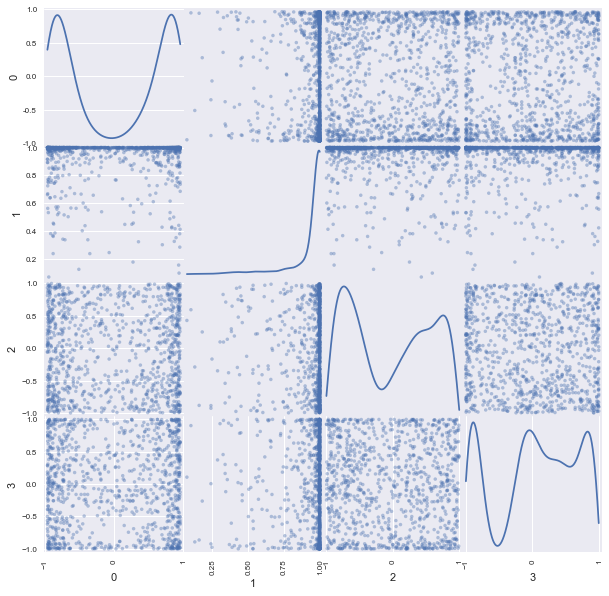

In [4]:
scatter_matrix(distDataFrame.T, alpha=0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

In [5]:
resultsTable(mixtures)

Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0,2.1436,0.8636,1.341e-28
1,1.7015,7.6758,0.4977,0
2,0,1.2039,0.9293,2.6022e-21
3,0,0.9747,0.9339,1.2713e-20


## NPCA-RLS Algorithm

In [6]:
[yNPCA, WNPCA] = NPCA_RLS(mixtures,runs = 1)

Execution time: 0.11901473999023438 seconds


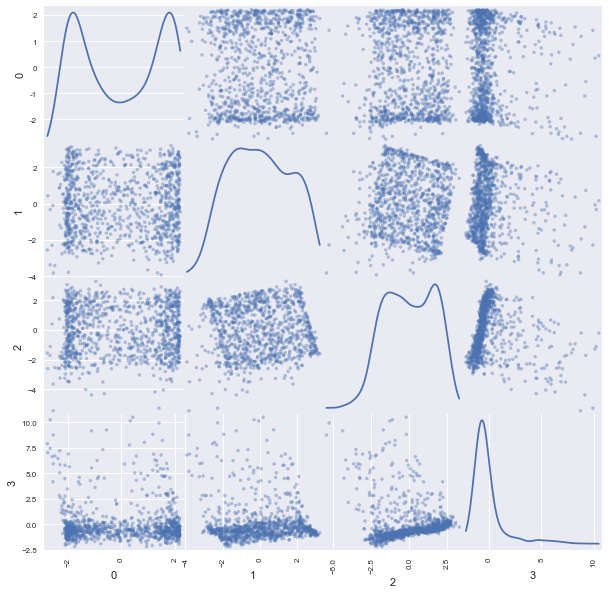

In [7]:
scatter_matrix(pd.DataFrame(yNPCA.T), alpha = 0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0,1.227,0.8792,3.6265e-27
1,0,0.2917,0.9728,9.4371e-13
2,0,0.3189,0.9706,2.3594e-13
3,0.7011,12.99,0.6726,4.3779e-40


C:\Users\Pedro\Anaconda3\lib\site-packages\statsmodels\sandbox\distributions\mv_measures.py:47: RuntimeWarning: invalid value encountered in sqrt
  mi_normed = np.sqrt(1. - np.exp(-2 * mi))


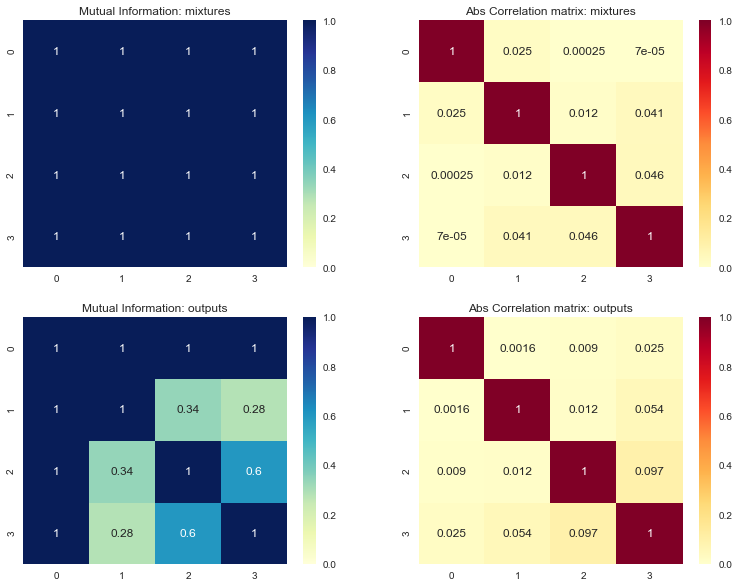

In [8]:
resultsTable(yNPCA)
plot_MutualInformation(mixtures, y = yNPCA, KDE = True)

## Chichocki-Unbehauen Algorithm Feedback network

In [9]:
[yFeedback, WFeedback] = cichocki_Feedback(mixtures, learningRate = 1e-1,runs  = 1) 

Execution time: 0.11001324653625488 seconds


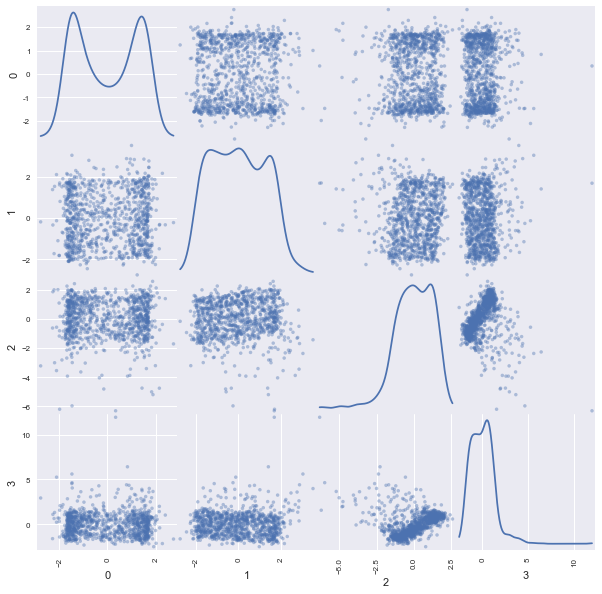

In [10]:
scatter_matrix(pd.DataFrame(yFeedback.T), alpha = 0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0,0.6677,0.9012,7.134e-25
1,0,0.3291,0.967,2.8007e-14
2,0.1425,0.8586,0.951,9.6103e-18
3,0.6486,2.3975,0.9186,8.8473e-23


C:\Users\Pedro\Anaconda3\lib\site-packages\statsmodels\sandbox\distributions\mv_measures.py:47: RuntimeWarning: invalid value encountered in sqrt
  mi_normed = np.sqrt(1. - np.exp(-2 * mi))


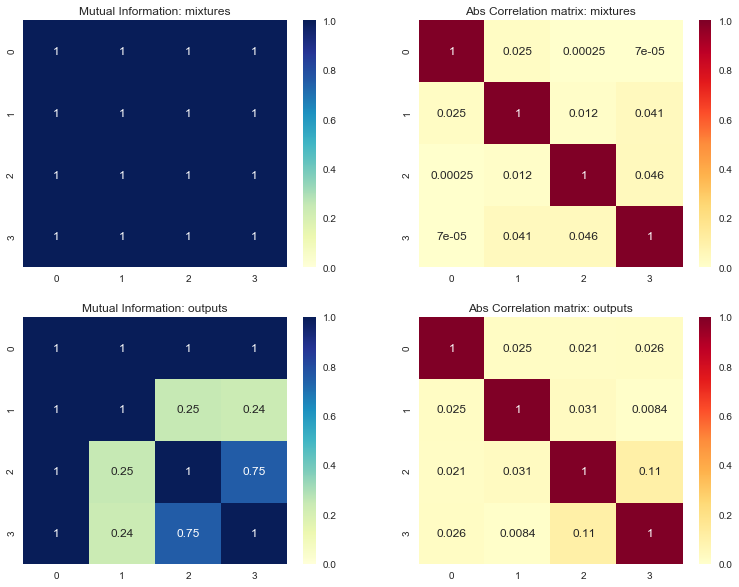

In [11]:
resultsTable(yFeedback)
plot_MutualInformation(mixtures, y = yFeedback, KDE = True)

## Chichocki-Unbehauen Algorithm Feedforward network

In [12]:
[yFeedforward, WFeedforward] = cichocki_Feedforward(mixtures, learningRate = 1e-6, runs = 1)

Execution time: 0.08951067924499512 seconds


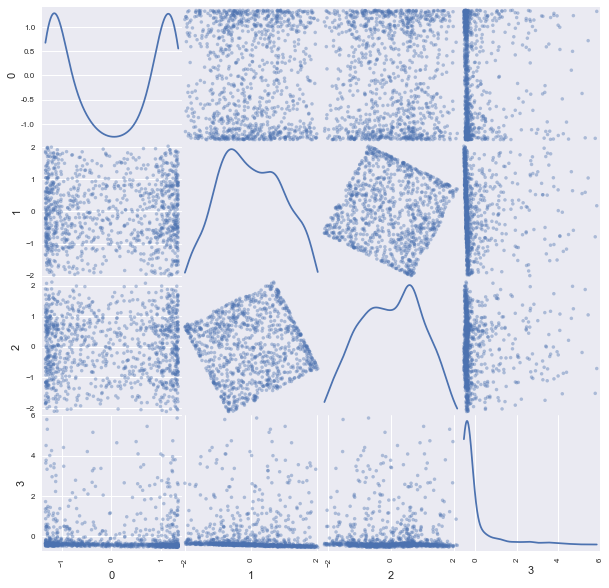

In [13]:
scatter_matrix(pd.DataFrame(yFeedforward.T), alpha = 0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0,1.9023,0.8636,1.3355e-28
1,0,0.3976,0.9783,4.6098e-11
2,0,0.414,0.9798,1.4756e-10
3,1.3646,13.5234,0.5256,1.4013e-45


C:\Users\Pedro\Anaconda3\lib\site-packages\statsmodels\sandbox\distributions\mv_measures.py:47: RuntimeWarning: invalid value encountered in sqrt
  mi_normed = np.sqrt(1. - np.exp(-2 * mi))


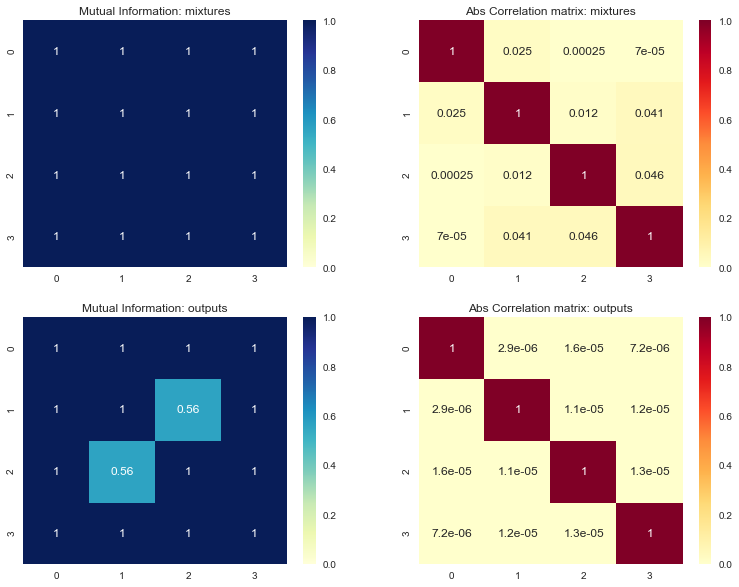

In [14]:
resultsTable(yFeedforward)
plot_MutualInformation(mixtures, y = yFeedforward, KDE = True)

# Hipóteses de PDF

Aqui o objetivo é encontrar PDFs que representem as fontes encontradas. Utiliza-se uma função que testa todas as funções de densidade probabilística implementadas no pacote SciPy em Python e verifica qual das hipóteses tem o menor $\chi ^2$.

## NPCA-RLS Algorithm

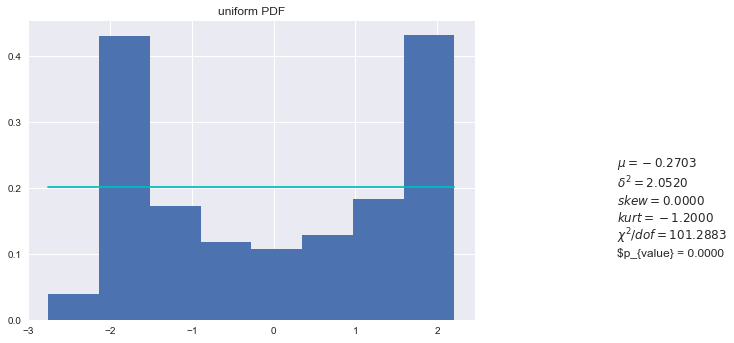

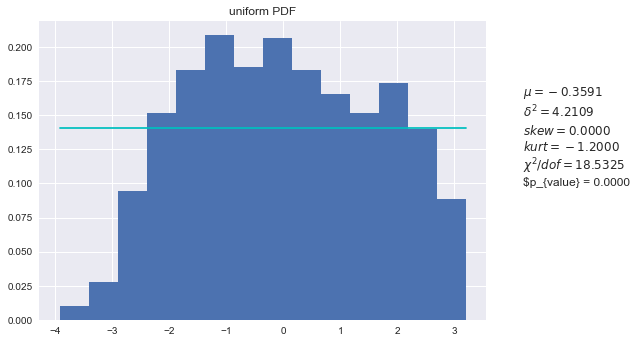

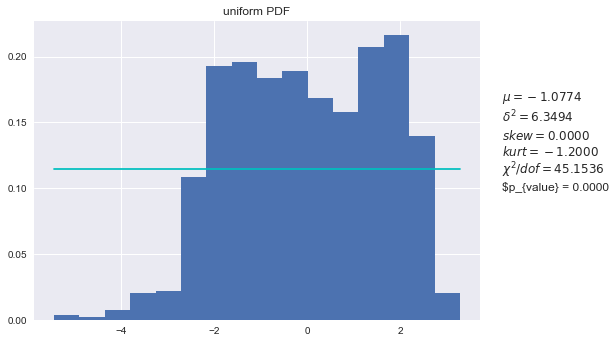

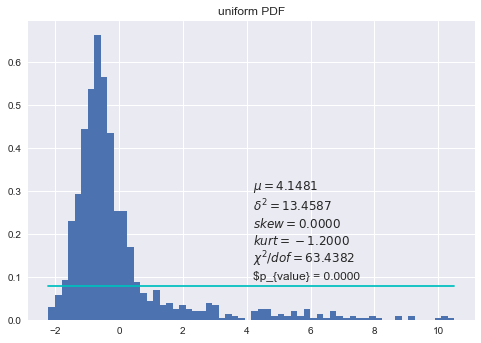

In [15]:
for i, y in enumerate(yNPCA):
    graph_fittedData(y)

## Chichocki-Unbehauen Algorithm Feedback network

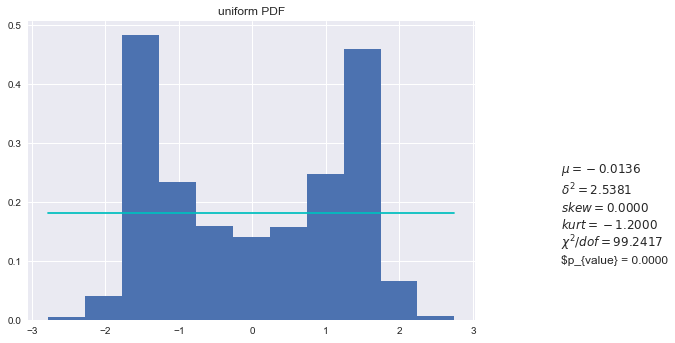

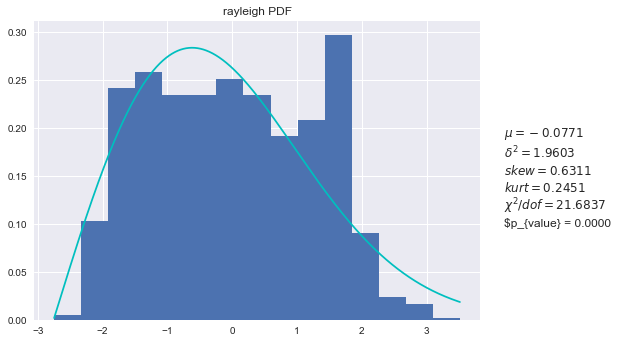

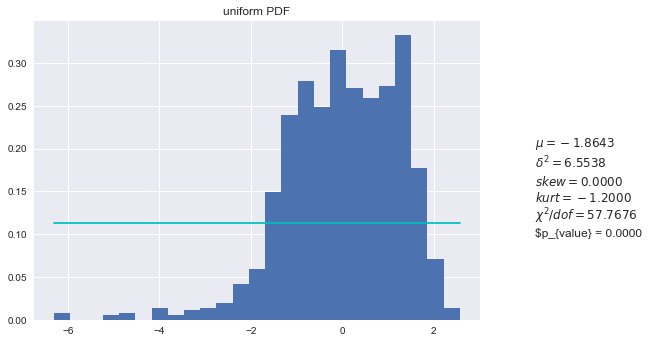

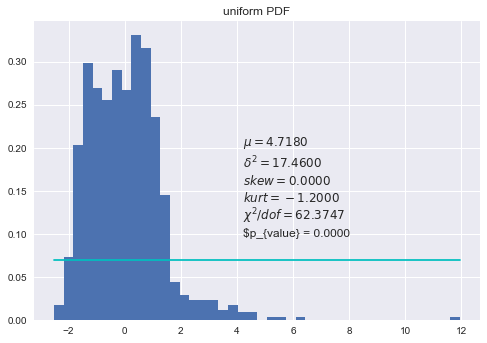

In [16]:
for i, y in enumerate(yFeedback):
    graph_fittedData(y)

## Chichocki-Unbehauen Algorithm Feedforward network

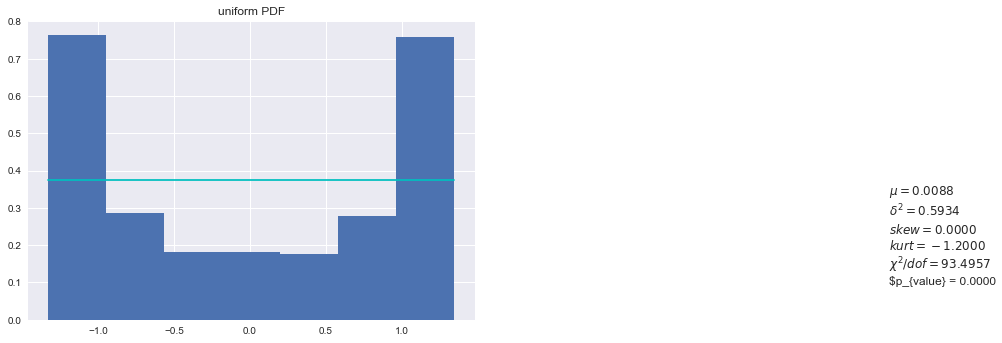

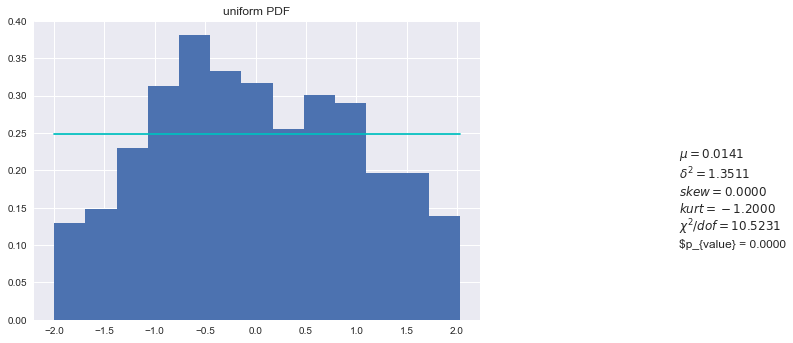

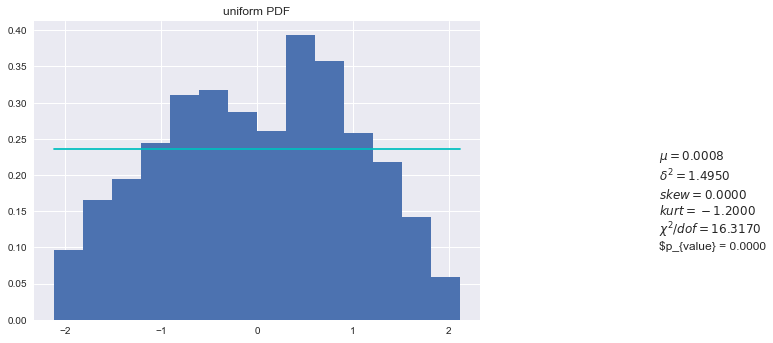

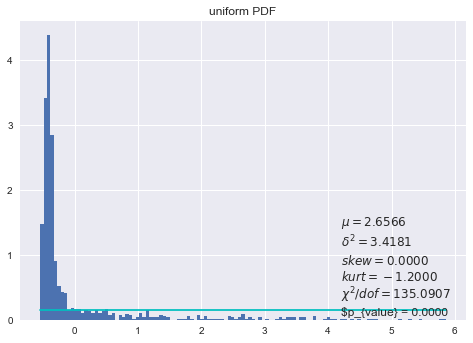

In [17]:
for i, y in enumerate(yFeedforward):
    graph_fittedData(y)

# Fontes conhecidas

In [18]:
filePathSource = 'https://raw.githubusercontent.com/micaelverissimo/ICA/master/Mixture_keys/SixthSource1000Stats.txt'
distDataFrameSources = pd.read_table(filePathSource, delimiter = '\s+', header = None)
mixtures = distDataFrame.values
print(distDataFrame.shape)
distDataFrame.T.head()

(4, 1000)


,0,1,2,3
0,0.126821,0.632137,0.417176,-0.404622
1,-0.957063,0.999996,0.984580,0.860499
2,0.768318,0.999999,-0.694455,0.557814
3,-0.945421,0.997646,-0.406144,0.523482
4,-0.312215,0.998544,0.918215,-0.754007


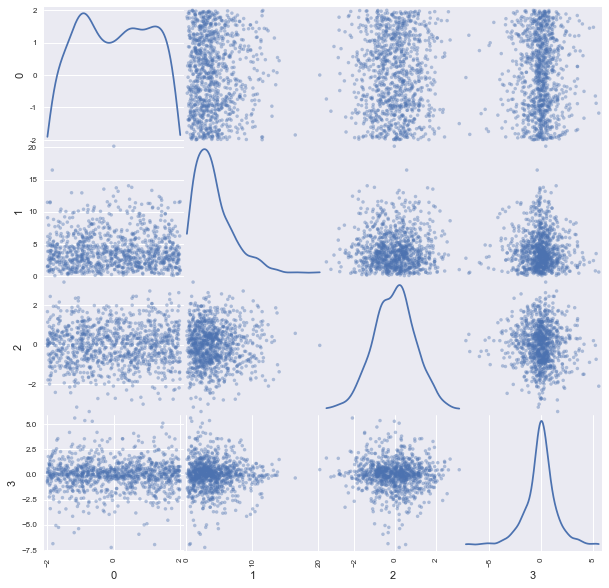

In [19]:
scatter_matrix(distDataFrameSources.T, alpha=0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

## NPCA-RLS

(4, 1000) (4, 1000)
[[ 0.23553216  0.19377366  0.67454598  1.22539581]
 [ 1.06792263  1.56792247  3.02692261  0.28139761]
 [ 0.84591312  0.20968698  0.26281339  2.04085491]
 [ 1.33102327  0.55735525  0.44836664  2.87362506]]


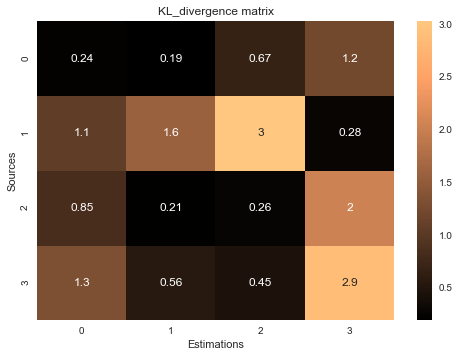

C:\Users\Pedro\Anaconda3\lib\site-packages\statsmodels\sandbox\distributions\mv_measures.py:47: RuntimeWarning: invalid value encountered in sqrt
  mi_normed = np.sqrt(1. - np.exp(-2 * mi))


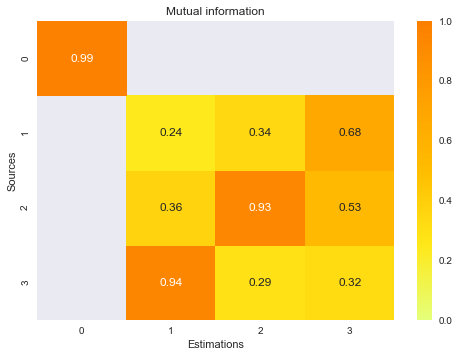

In [20]:
from evaluation import KLmatrix, MImatrix
KLmatrix(distDataFrameSources.values,yNPCA)
MImatrix(distDataFrameSources.values,yNPCA)

## Chichocki-Unbehauen Algorithm Feedback network

(4, 1000) (4, 1000)
[[  0.63377444   0.61184241   1.02411146   6.24211848]
 [  1.84049015   1.10360153  11.4045534    0.84184442]
 [  0.46296816   0.21875228   1.44311177   7.17574882]
 [  0.90678748   0.6200897    0.79072413  12.83022832]]


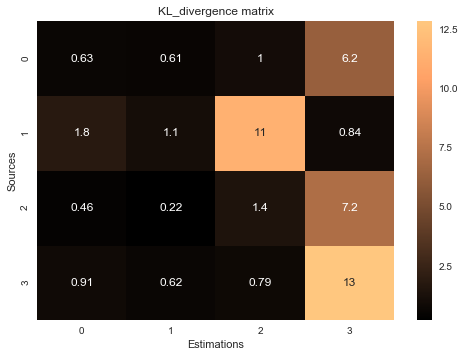

C:\Users\Pedro\Anaconda3\lib\site-packages\statsmodels\sandbox\distributions\mv_measures.py:47: RuntimeWarning: invalid value encountered in sqrt
  mi_normed = np.sqrt(1. - np.exp(-2 * mi))


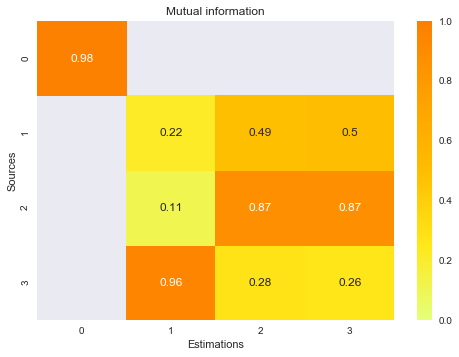

In [21]:
KLmatrix(distDataFrameSources.values,yFeedback)
MImatrix(distDataFrameSources.values,yFeedback)

## Chichocki-Unbehauen Algorithm Feedforward network

(4, 1000) (4, 1000)
[[ 0.19815704  0.0524204   0.10550279  1.55167368]
 [ 0.65172732  0.89489916  0.93075079  1.10349128]
 [ 1.05324922  0.27203685  0.2204532   2.53735234]
 [ 1.40404759  0.70640329  0.56977797  3.97719559]]


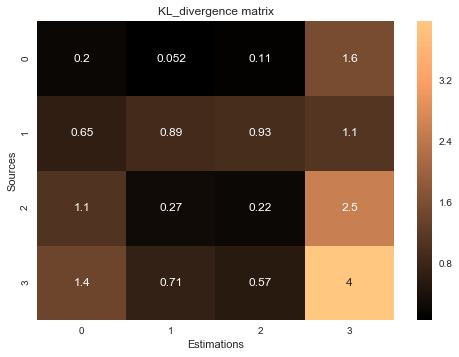

C:\Users\Pedro\Anaconda3\lib\site-packages\statsmodels\sandbox\distributions\mv_measures.py:47: RuntimeWarning: invalid value encountered in sqrt
  mi_normed = np.sqrt(1. - np.exp(-2 * mi))


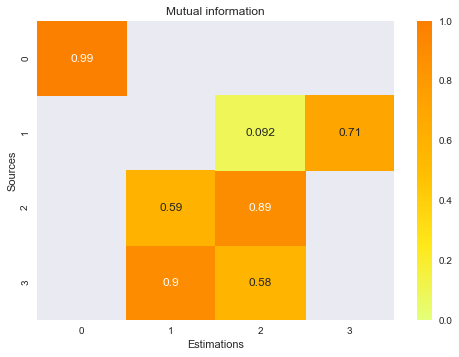

In [22]:
KLmatrix(distDataFrameSources.values,yFeedforward)
MImatrix(distDataFrameSources.values,yFeedforward)